## Breakeven Analysis: 3D Printing vs. Injection Molding ##

Detemine the breakeven point when comparing the production of the plastic enclosure for the SomniCloud
 - __Given__: Enclosure volume is $2.57 in^3$

In [18]:
part_vol = 2.57 # in^3

### 3D Printing Specs ###

- \$4.25 / cubic inch of ABS
- Tooling Cost: \$0.00
- Machine Time Cost: \$12.00 / hour
- Print Time: 4 hours

In [19]:
# Set 3D ABS variable constants
usd_in3_3d = 4.25 # $/in^3
setup_3d = 0.00 # $ Setup Cost
mc_3d = 12.00 # $/hr
time_3d = 4.0 # hrs

### Injection Mold Data ###

- \$4.50 / lb ABS
- Mold Cost: \$6500.00
- Machine Time Cost: \$80.00 / hour
- Cycle Time: 30 seconds

In [20]:
# Set Injection Mold ABS variable constants
usd_lb_im = 6.50 # $/lb
setup_im = 50000.00 # $ Setup Cost
mc_im = 120.00 # $/hr
time_im = 60 / 3600 # hrs

### Step 1: Convert \$ / lb to \$ / cubic inch ###
- Density of ABS: $\rho_{ABS} = 1.07 g/cm^{3}$


\begin{equation} 
\left(\frac{\$4.50}{lb}\right) \
\left(\frac{1.07g}{cm^{3}}\right) \
\left(\frac{2.2lb}{1000g}\right) \
\left(\frac{2.54cm}{1in}\right)^{3} \
= X \frac{\$}{in_{3}}
\end{equation}


In [21]:
# Create variables for given constants
rho_abs = 1.07 # g/cm^3

In [22]:
# Calculate $ per in^3 of injection molded ABS
usd_in3_im = (usd_lb_im) * (rho_abs) * (2.2 / 1000) * ((2.54 / 1)**3) # $/in^3
print(f"Injection Molded ABS [$/in^3]: {usd_in3_im}")

Injection Molded ABS [$/in^3]: 0.25073846626400004


### Step 2: Calculate Cost Functions ###

- $Total\ Cost = (Cost\ per\ Unit) * (Number\ of\ Units) + (Setup\ Cost)$


- $Cost\ per\ Unit = (ABS\ Cost\ per\ Unit) + (Machine\ Time\ Cost\ per\ Unit)$


- $ABS\ Cost\ per\ Unit = (ABS\ Cost\ per\ in^{3})  * (Part Volume)$


- $Cost\ per\ Unit = (Machine\ Time\ Cost\ per\ Hour) + (Machine\ Time)$
                                                                                                                       

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
N = np.linspace(0,1000,10000)

### Cost Function for 3D Printing ###                                                                                

In [24]:
# Cost per unit for 3D printing
abs_cpu_3d = usd_in3_3d * part_vol # ABS Cost per Unit
mc_cpu_3d = mc_3d * time_3d # Machine Cost per Unit
t_cpu_3d = abs_cpu_3d + mc_cpu_3d # Total per unit cost

# Cost function for 3D printing
C_3d = (t_cpu_3d)*N + setup_3d

print(f"3D Printing Cost per Unit: ${t_cpu_3d:.2f}")
print(f"3D Printing Setup Cost: ${setup_3d:.2f}")

3D Printing Cost per Unit: $58.92
3D Printing Setup Cost: $0.00


### Cost Function for Injection Molding Printing ###                                                                                

In [25]:
# Cost per unit for 3D printing
abs_cpu_im = usd_in3_im * part_vol # ABS Cost per Unit
mc_cpu_im = mc_im * time_im # Machine Cost per Unit
t_cpu_im = abs_cpu_im + mc_cpu_im # Total per unit cost

# Cost function for 3D printing
C_im = (t_cpu_im)*N + setup_im

print(f"3D Printing Cost per Unit: ${t_cpu_im:.2f}")
print(f"3D Printing Setup Cost: ${setup_im:.2f}")

3D Printing Cost per Unit: $2.64
3D Printing Setup Cost: $50000.00


### Step 3: Plot Results ###

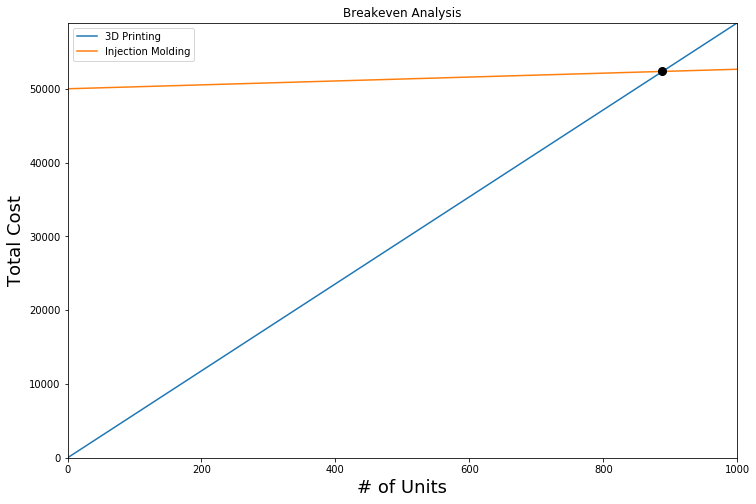

Breakeven point = 889 units


In [26]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(N,C_3d, label=r"3D Printing")
ax.plot(N,C_im, label=r"Injection Molding")

idx = np.argwhere(np.diff(np.sign(C_3d - C_im)) != 0).reshape(-1) + 0
ax.plot(N[idx], C_3d[idx], 'o', markersize=8, color='black')

ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'# of Units', fontsize=18)
ax.set_ylabel(r'Total Cost', fontsize=18)
ax.set_title('Breakeven Analysis')

ax.set_xlim([min(N), max(N)])
ax.set_ylim([0, max(C_3d)])
plt.show()

print(f"Breakeven point = {math.ceil(N[idx])} units")